In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the original image and convert it to gray
img_bgr = cv2.imread('opencv-template-matching-python-tutorial.jpg')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# load the template image, the one we are looking for in the original image
template = cv2.imread('opencv-template-for-matching.jpg', 0) 

w, h = template.shape[::-1]  # get the template image dimensions

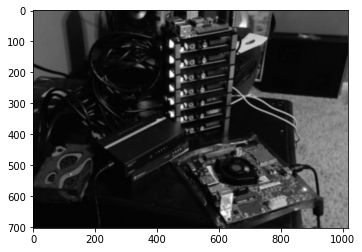

In [2]:
plt.imshow(img_gray, cmap='gray', interpolation='bicubic')
plt.show()

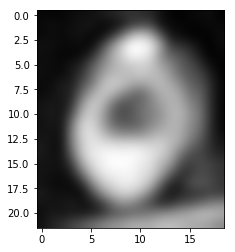

In [3]:
plt.imshow(template, cmap='gray', interpolation='bicubic')
plt.show()

In [7]:
"""
find the template in the original image
print the locations where the match is higher than the threshold (80%)
"""
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8  # 80%
loc = np.where(res >= threshold)  # any location that passed the threshold
locations = zip(*loc[::-1])

"""
draw a yellow rectangles over the parts in the original image which match the template
"""
for pt in locations:
    cv2.rectangle(img_bgr, pt, (pt[0]+w, pt[1]+h), (0, 255, 255), 1)
cv2.imshow('detected', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()